In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir("c:/Users/work/analisys/resistant")

In [6]:
df = pd.read_csv("Resist_new.csv", header = 0, index_col= 0, sep="\t")

In [7]:

df.head()

,Ben,No,Tet,Mac,Tei,Oxic
#,,,,,,
5852,1,0,1,1,0,1
6037,0,0,0,0,0,0
6041,0,0,0,0,0,0
6046,1,1,0,1,0,1
6050,1,0,0,1,0,1


In [8]:
print(df)

      Ben  No  Tet  Mac  Tei  Oxic
#                                 
5852    1   0    1    1    0     1
6037    0   0    0    0    0     0
6041    0   0    0    0    0     0
6046    1   1    0    1    0     1
6050    1   0    0    1    0     1
...   ...  ..  ...  ...  ...   ...
4532    1   0    0    1    1     1
4548    0   0    0    0    0     1
4923    0   0    0    0    0     0
4753    0   0    0    0    0     0
5663    0   0    1    1    0     1

[126 rows x 6 columns]


In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Объект, в котором будет хранится информация о последовательном слиянии кластеров
link = linkage(df, 'ward', 'euclidean')

In [29]:
link[:6]

array([[  0.,   8.,   0.,   2.],
       [  1.,   2.,   0.,   2.],
       [ 10., 127.,   0.,   3.],
       [  3.,   5.,   0.,   2.],
       [  4., 110.,   0.,   2.],
       [ 17., 129.,   0.,   3.]])

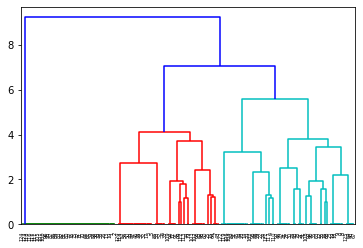

In [30]:
# Функция для построения дендрограммы
dn = dendrogram(link)

In [31]:
# Останавливаем объединение, если расстояние между кластерами превышает 3
df['cluster'] = fcluster(link, 4, criterion='distance')


In [32]:
df.groupby('cluster').mean()

,Ben,No,Tet,Mac,Tei,Oxic
cluster,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,1.000000,1.000000,0.263158,1.000000,0.000000,1.00
3,0.250000,0.950000,0.100000,0.550000,0.050000,0.75
4,0.190476,0.000000,0.000000,0.428571,0.047619,1.00
5,0.266667,0.166667,1.000000,0.700000,0.033333,0.60


In [33]:
df.groupby('cluster').size()

cluster
1    36
2    19
3    20
4    21
5    30
dtype: int64

In [22]:
dist = link[:, 2]
dist

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Text(22, 2.6, '4 clusters')

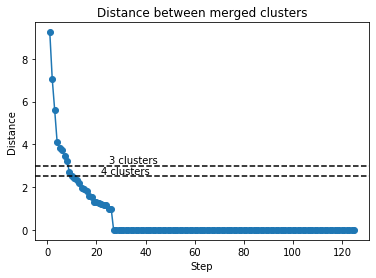

In [23]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(3, c='k', linestyle='dashed')
plt.axhline(2.52, c='k', linestyle='dashed')
plt.text(25, 3.1, '3 clusters')
plt.text(22, 2.6, '4 clusters')

In [24]:
df.groupby('cluster').describe()

Ben                                                  No            \
        count      mean       std  min  25%  50%   75%  max count      mean   
cluster                                                                       
1        36.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0  36.0  0.000000   
2        19.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0  19.0  1.000000   
3        20.0  0.250000  0.444262  0.0  0.0  0.0  0.25  1.0  20.0  0.950000   
4        21.0  0.190476  0.402374  0.0  0.0  0.0  0.00  1.0  21.0  0.000000   
5        30.0  0.266667  0.449776  0.0  0.0  0.0  0.75  1.0  30.0  0.166667   

         ...  Tei       Oxic                                            
         ...  75%  max count  mean       std  min   25%  50%  75%  max  
cluster  ...                                                            
1        ...  0.0  0.0  36.0  0.00  0.000000  0.0  0.00  0.0  0.0  0.0  
2        ...  0.0  0.0  19.0  1.00  0.000000  1.0  1.00  1.0  1.0  1.0  
3        ...  0.0  1.0  20.0  0.75  0.444262  0.0  0.75  1.0  1.0  1.0  
4        ...  0.0  1.0  21.0  1.00  0.000000  1.0  1.00  1.0  1.0  1.0  
5        ...  0.0  1.0  30.0  0.60  0.498273  0.0  0.00  1.0  1.0  1.0  

[5 rows x 48 columns]

In [35]:
df.groupby('cluster').all()

,Ben,No,Tet,Mac,Tei,Oxic
cluster,,,,,,
1,False,False,False,False,False,False
2,True,True,False,True,False,True
3,False,False,False,False,False,False
4,False,False,False,False,False,True
5,False,False,True,False,False,False
